In [5]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
ACCESS_TOKEN = "3294900861-8vMK9Y2pUB7tWAUkzv3XM7yX9HKvY1kKvyE8gUC"
ACCESS_TOKEN_SECRET = "R8X52w4nNlbSBUlp0KSEQYVT6h0V8zse6AwAR947OME26"
CONSUMER_KEY = "fpwWvMuOVI0xHbacBwMaSCHqV" 
CONSUMER_SECRET = "OQoH53rEeXYZD62lcRpN85oSIVWjj8GIZ44HQkUYuX9oLLw3e5"

# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
# Creation of the actual interface, using authentication
api = tweepy.API(auth)


In [7]:
searchTerm = '#nepal'
tweetAmount = 200
tweetPages = 3

In [9]:
tweets = tweepy.Cursor(api.search, q = searchTerm, lang = 'en').items(tweetAmount)
#tweets = tweepy.Cursor(api.search, q = searchTerm, lang = 'en').pages(tweetPages)
# Create a dataframe for posts
df1 = pd.DataFrame([tweet.text for tweet in tweets], columns = ['Tweets'])
df1.head(5)

,Tweets
0,@SAfridiOfficial Boom Boom will be in action f...
1,intriguing premise…maybe one of a kind \nCheck...
2,it is such a wonderful when some foreign playe...
3,RT @HartwigSchafer: It was a pleasure to meet ...
4,RT @eplt20official: Welcome To #Nepal LALA. It...


In [10]:
tweeteo=[]
#likes=[]
#time = []
for tuit in tweepy.Cursor(api.search, q = searchTerm, lang = 'en').items(1000):
    #time.append(tuit.created_at)
    #likes.append(tuit.favorite_count)
    tweeteo.append(tuit)

In [11]:
# Create a dataframe for posts
df = pd.DataFrame([tweet.text for tweet in tweeteo], columns = ['Tweets'])
df.shape[0]

1000

print("Show recent tweets \n")
for tweet in tweets:
  print(tweet.text+'\n')

In [12]:
### Clean the text

# Create a function to class and tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9_:]+','',text) # Remove mentions
    #text = re.sub(r'#','',text) #Removing the # symbol
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #Removing hyperlink
    text = re.sub(r'[0-9\)]','',text) #Removing numbers
    #text = re.sub(r'\S+','',text) #Removing hyperlink
    return text

In [13]:
# Cleaning the text

df['Tweets'] = df['Tweets'].apply(cleanTxt)  #or #df.Tweets = df.Tweets.apply(cleanTxt)

# Show the clean text
df.head(5)

,Tweets
0,Boom Boom will be in action from Kathmandu Ki...
1,intriguing premise…maybe one of a kind \nCheck...
2,it is such a wonderful when some foreign playe...
3,It was a pleasure to meet Honorable . We discu...
4,Welcome To #Nepal LALA. It’s showtime th Septe...


In [14]:
# Creata a function to get the subjectivity(Tells how opinionated the text is)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creata a function to get the polarity(Tells how positive or negative the text is)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
# Creating two new columns in the dataframe for subjectivity and Polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df.head(5)

,Tweets,Subjectivity,Polarity
0,Boom Boom will be in action from Kathmandu Ki...,0.100,0.100
1,intriguing premise…maybe one of a kind \nCheck...,0.650,0.450
2,it is such a wonderful when some foreign playe...,0.485,0.015
3,It was a pleasure to meet Honorable . We discu...,0.000,0.000
4,Welcome To #Nepal LALA. It’s showtime th Septe...,0.900,0.800


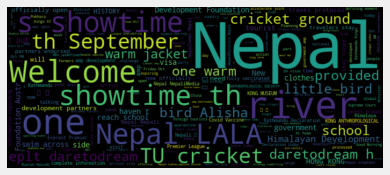

In [17]:
# Plot Word Cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [18]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(5)

,Tweets,Subjectivity,Polarity,Analysis
0,Boom Boom will be in action from Kathmandu Ki...,0.100,0.100,Positive
1,intriguing premise…maybe one of a kind \nCheck...,0.650,0.450,Positive
2,it is such a wonderful when some foreign playe...,0.485,0.015,Positive
3,It was a pleasure to meet Honorable . We discu...,0.000,0.000,Neutral
4,Welcome To #Nepal LALA. It’s showtime th Septe...,0.900,0.800,Positive


No of positive tweets 401


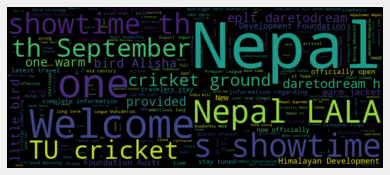

In [19]:
# Creating dataframe with just positive tweets
posDf = df[df['Analysis']=='Positive']
posTweets = posDf['Tweets']
print('No of positive tweets', posTweets.shape[0])
# Plot Word Cloud for positive tweets
allWords = ''.join([twts for twts in posDf['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

No of negative tweets 136


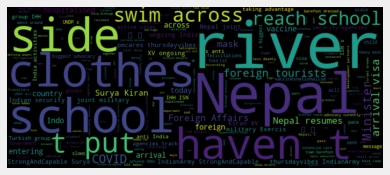

In [20]:
# Creating dataframe with just negative tweets
negDf = df[df['Analysis']=='Negative']
negTweets = negDf['Tweets']
print('No of negative tweets',negTweets.shape[0])
# Plot Word Cloud for negative tweets
allWords = ''.join([twts for twts in negDf['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

No of neutral tweets 463


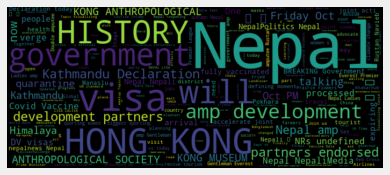

In [21]:
# Creating dataframe with just neutral tweets
neuDf = df[df['Analysis']=='Neutral']
neuTweets = neuDf['Tweets']
print('No of neutral tweets',neuTweets.shape[0])
# Plot Word Cloud for neutral tweets
allWords = ''.join([twts for twts in neuDf['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Sentiment Analysis')

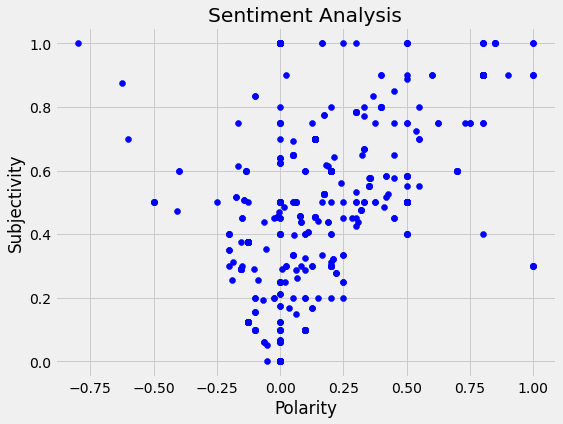

In [22]:
## Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'],df['Subjectivity'],color = 'Blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis')

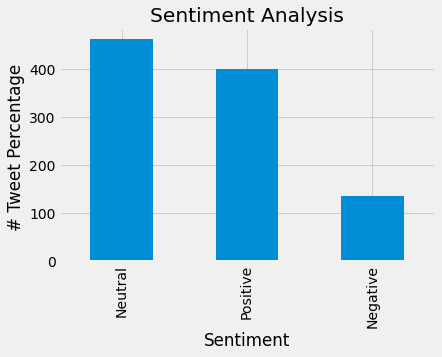

In [23]:
#Plot and visualize the positivity of the tweets
df['Analysis'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('# Tweet Percentage ')
plt.title('Sentiment Analysis')
plt.show()

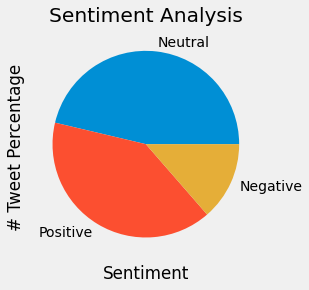

In [24]:
#Plot and visualize the positivity of the tweets
df['Analysis'].value_counts().plot(kind='pie')
plt.xlabel('Sentiment')
plt.ylabel('# Tweet Percentage ')
plt.title('Sentiment Analysis')
plt.show()